In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant < 5].reset_index(drop=True)

data['block_label'] += 1

data.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0


#### Initialise the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 2)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('DDM', 'hierDDM', 2)

In [5]:
model.starting_point_bias

False

#### Fit

In [6]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

# bayesian model
drift_priors = {'mu_mu':1, 'sd_mu':1, 'mu_sd':0, 'sd_sd':1}
threshold_priors = {'mu_mu':-1, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}
ndt_priors = {'mu_mu':-2, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}
#sp_priors = None # set to default

starting_point = .5

In [7]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    starting_point=starting_point,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
327.0 of 1000 iterations ended with a divergence (32.7%)
  Try running with larger adapt_delta to remove the divergences
210 of 1000 iterations saturated the maximum tree depth of 10 (21.0%)
Run again with max_depth set to a larger value to avoid saturation
E-BFMI indicated no pathological behavior


In [9]:
model_fit.rhat.describe()

,rhat
count,18.000000
mean,1.011348
std,0.007259
min,1.001597
25%,1.005167
50%,1.011177
75%,1.016364
max,1.026785


#### get Rhat

In [11]:
model_fit.rhat.head()

,rhat,variable
0,1.009450,mu_drift
1,1.006202,mu_threshold
2,1.022406,mu_ndt
3,1.026785,sd_drift
4,1.015283,sd_threshold


#### calculate wAIC

In [12]:
model_fit.waic

{'lppd': -731.4679212036067,
 'p_waic': 16.76441277186291,
 'waic': 1496.4646679509392,
 'waic_se': 66.84455684708253}

### Posteriors

In [13]:
model_fit.samples

,chain,draw,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],threshold_sbj[1],threshold_sbj[2],threshold_sbj[3],threshold_sbj[4],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4]
0,0,168,0.861474,0.935407,0.190469,1.117599,0.803187,0.942192,0.875371,1.597495,1.694587,1.599108,2.134571,0.844003,0.651676,0.879735,0.699513
1,0,206,0.906137,1.096779,0.560366,1.048930,0.739737,1.004903,0.756106,1.621242,1.652486,1.527152,2.107465,0.823129,0.654002,0.887634,0.702131
2,0,232,0.980795,1.076688,0.584574,1.007412,0.938019,0.997248,0.730349,1.746201,1.688912,1.543405,2.095060,0.831979,0.663834,0.883841,0.706836
3,0,473,1.150904,0.668924,0.297990,1.255802,0.833359,0.952127,0.839988,1.699626,1.717099,1.558395,2.141892,0.832701,0.654771,0.874723,0.686269
4,0,453,0.981153,0.937355,0.130320,1.237029,0.786318,1.010801,0.816520,1.533274,1.624681,1.543578,2.073689,0.848410,0.657951,0.888024,0.702336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,340,0.549607,1.217809,0.695409,1.058639,0.794121,0.936868,0.658842,1.628939,1.563319,1.636094,2.076837,0.842829,0.665627,0.869540,0.711828
996,1,397,0.898394,0.389292,0.181773,1.133806,0.726901,0.845479,0.718138,1.695769,1.612337,1.527116,2.144323,0.840421,0.663433,0.876102,0.689473
997,1,302,0.827515,0.711308,0.665326,0.955948,0.820982,0.931229,0.659411,1.609736,1.618704,1.534259,2.006624,0.840907,0.664479,0.876377,0.705454
998,1,109,0.873465,0.515824,0.129269,1.050069,0.822731,0.877598,0.634246,1.641516,1.564700,1.482911,2.121779,0.845081,0.672860,0.884900,0.693369


In [14]:
model_fit.trial_samples

OrderedDict([('drift_t',
              array([[1.11759879, 1.11759879, 1.11759879, ..., 0.87537095, 0.87537095,
                      0.87537095],
                     [1.04892953, 1.04892953, 1.04892953, ..., 0.75610622, 0.75610622,
                      0.75610622],
                     [1.00741229, 1.00741229, 1.00741229, ..., 0.73034866, 0.73034866,
                      0.73034866],
                     ...,
                     [0.95594821, 0.95594821, 0.95594821, ..., 0.65941143, 0.65941143,
                      0.65941143],
                     [1.05006906, 1.05006906, 1.05006906, ..., 0.63424562, 0.63424562,
                      0.63424562],
                     [1.22986256, 1.22986256, 1.22986256, ..., 0.57942342, 0.57942342,
                      0.57942342]])),
             ('threshold_t',
              array([[1.59749529, 1.59749529, 1.59749529, ..., 2.13457094, 2.13457094,
                      2.13457094],
                     [1.62124236, 1.62124236, 1.62124236, ..., 

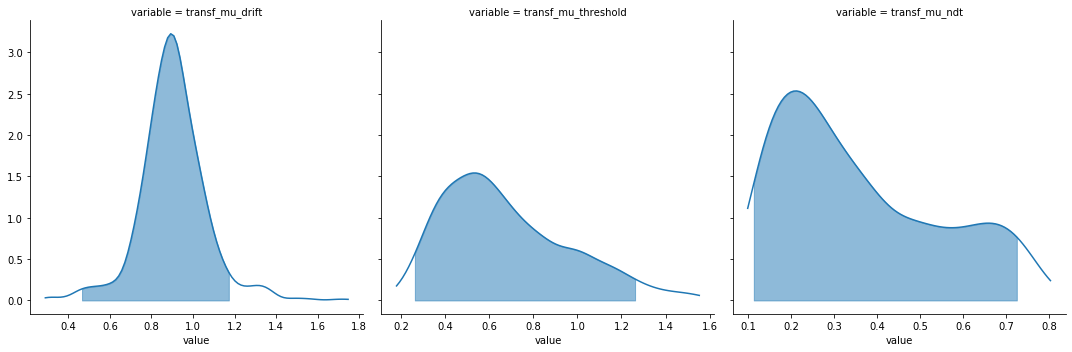

In [15]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

In [16]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [17]:
pp_rt

array([[1.56000275, 0.93500275, 1.10300275, ..., 1.60051334, 1.28551334,
        2.43851334],
       [1.35712912, 1.25912912, 1.40012912, ..., 3.41213095, 3.14713095,
        0.88513095],
       [1.09397898, 1.05697898, 1.71197898, ..., 1.42483566, 1.21583566,
        1.16983566],
       ...,
       [0.98863176, 1.41863176, 1.33563176, ..., 1.04926877, 1.52826877,
        1.90926877],
       [1.61537207, 1.06937207, 1.29437207, ..., 1.97120206, 2.50820206,
        3.35920206],
       [1.61971334, 1.19071334, 1.82971334, ..., 3.22143601, 1.57843601,
        1.19043601]])

In [18]:
pp_acc

array([[1., 1., 0., ..., 0., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [19]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.842380,1.438283,2.305550,0.892676,1.074676,1.245003,1.488735,2.148003,0.949006,1.111349,1.277513,1.556149,2.100646
2,0.823591,1.448913,2.246325,0.919931,1.093832,1.236002,1.551434,2.116131,0.958931,1.094732,1.258129,1.548981,2.209333
3,0.818372,1.451904,2.278651,0.942136,1.088636,1.174410,1.370365,2.018335,0.969237,1.126836,1.297341,1.600835,2.207936
4,0.852818,1.429312,2.147292,0.935723,1.115723,1.310723,1.535771,2.077701,0.946570,1.106523,1.251771,1.541923,2.106728
5,0.831942,1.396321,2.142555,0.938951,1.093336,1.241024,1.482336,2.042024,0.961335,1.095809,1.258024,1.467028,2.011811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.843424,1.462389,3.654687,0.993249,1.150933,1.321709,1.593081,2.204683,0.960887,1.119424,1.299586,1.560376,2.083586
97,0.805846,1.430482,2.457654,0.947271,1.124683,1.334307,1.574286,2.153574,0.949471,1.094346,1.248574,1.493552,2.192419
98,0.836117,1.463270,2.407468,0.951712,1.098025,1.261432,1.535469,2.076771,0.964269,1.121269,1.282632,1.587025,2.185632


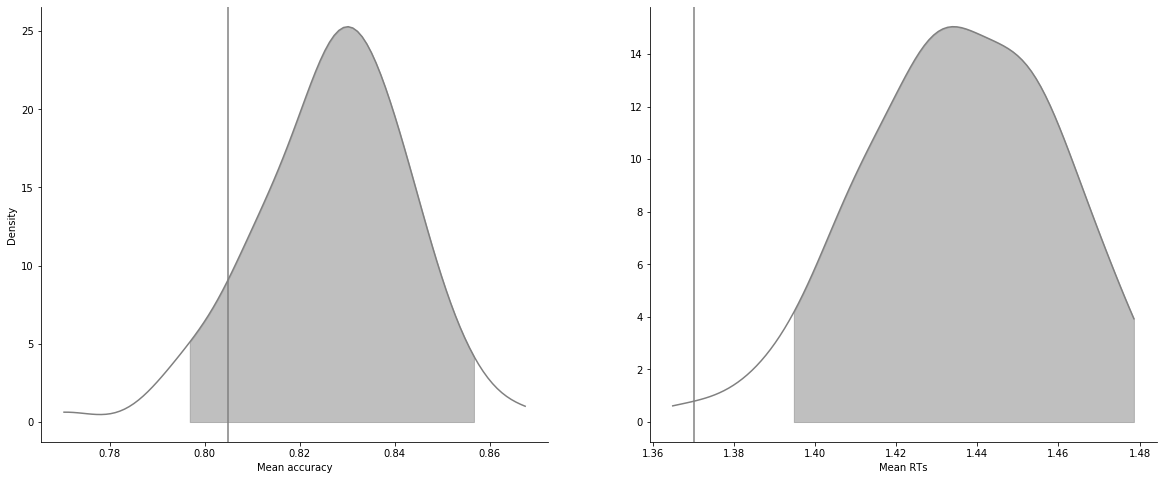

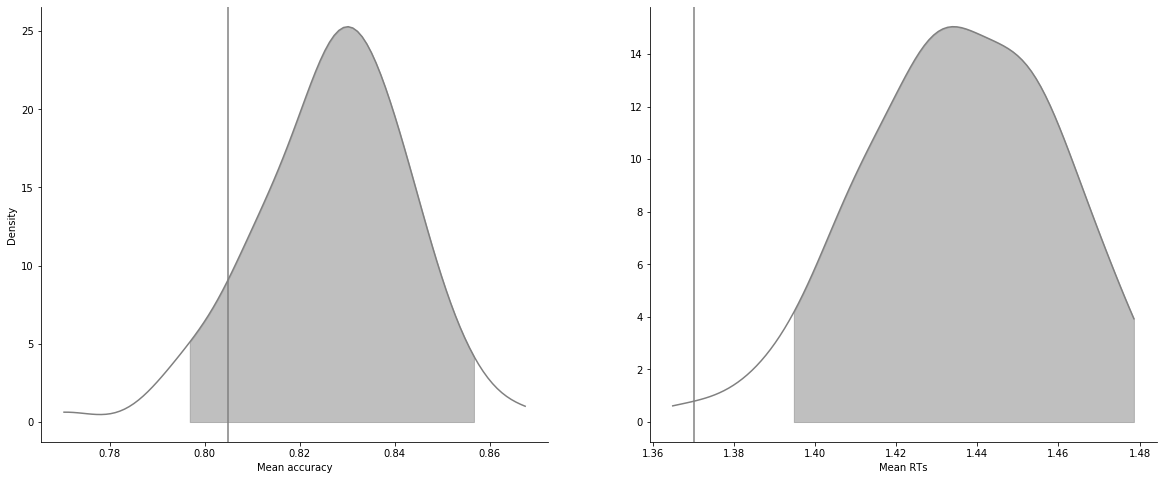

In [20]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

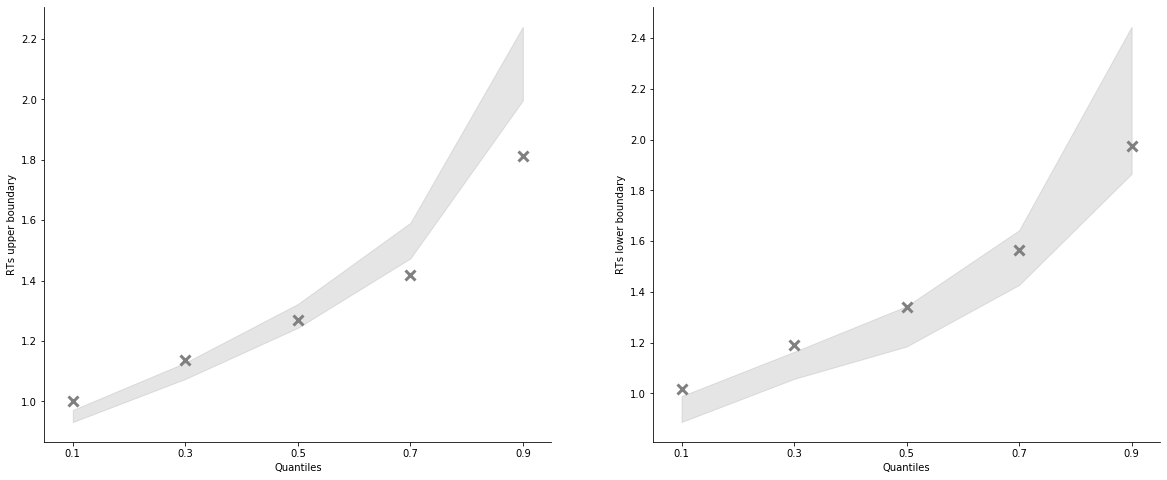

In [25]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [21]:
import numpy as np

In [22]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [23]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,accuracy_flipped,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,-1,1.0,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,-0.0,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,-1,1.0,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,-1,1.0,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,-0.0,CD,1


In [24]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.848101  1.418353  1.825560   
                        2            0.886076  1.386328  1.017644   
                        3            0.860759  1.514746  1.558709   
                        4            0.873418  1.358829  1.760592   
                        5            0.860759  1.396196  2.574631   
...                                       ...       ...       ...   
3.0         CD          96           0.825000  1.447206  1.941872   
                        97           0.862500  1.410209  3.108885   
                        98           0.825000  1.379877  4.285258   
                        99           0.837500  1.492163  1.285851   
                        100          0.812500  1.386769  1.237994   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.076413        1.077491   
                        2              1.120878        1.103929   
                        3              1.200836        1.159579   
                        4              1.075120        1.100141   
                        5              1.195336        1.122164   
...                                         ...             ...   
3.0         CD          96             1.221449        1.118249   
                        97             1.095095        1.125239   
                        98             1.102252        1.094950   
                        99             1.156928        1.172938   
                        100            0.950914        1.118913   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.208676        1.323676   
                        2              1.211634        1.349130   
                        3              1.314836        1.285841   
                        4              1.213996        1.261771   
                        5              1.269024        1.244410   
...                                         ...             ...   
3.0         CD          96             1.303709        1.319393   
                        97             1.256271        1.298519   
                        98             1.160532        1.228025   
                        99             1.367010        1.395010   
                        100            1.040713        1.289713   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1.0         AB          1              1.304093        1.561588  
                        2              1.452453        1.495630  
                        3              1.534836        1.641040  
                        4              1.384950        1.363723  
                        5              1.403024        1.454203  
...                                         ...             ...  
3.0         CD          96             1.533181        1.511888  
                        97             1.538271        1.464495  
                        98             1.559212        1.385647  
                        99             1.664810        1.569687  
                        100            1.321980        1.613593  

[1200 rows x 9 columns]

In [26]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.800000  1.444315  1.823600         1.063776   
           2            0.833333  1.388607  1.636938         1.010782   
           3            0.841667  1.474306  1.712007         1.103039   
           4            0.891667  1.374132  2.772044         0.999942   
           5            0.808333  1.404505  1.604394         1.120136   
...                          ...       ...       ...              ...   
8          96           0.805085  1.401823  1.793847         1.198983   
           97           0.762712  1.439362  1.399828         1.285038   
           98           0.822034  1.467368  1.895339         1.034432   
           99           0.872881  1.405066  1.479351         1.111365   
           100          0.847458  1.442175  2.836283         1.155482   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.078013         1.286513        1.229624   
           2             1.127934         1.229318        1.322382   
           3             1.079979         1.157836        1.256979   
           4             1.075518         1.222723        1.294269   
           5             1.075701         1.402024        1.243024   
...                           ...              ...             ...   
8          96            1.061864         1.572709        1.212393   
           97            1.090552         1.481807        1.259807   
           98            1.074632         1.172632        1.284432   
           99            1.105813         1.236372        1.283016   
           100           1.111206         1.501909        1.225882   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.783470        1.551735  
           2              1.415302        1.487882  
           3              1.439834        1.528836  
           4              1.285529        1.447870  
           5              1.639165        1.462024  
...                            ...             ...  
8          96             1.799430        1.390272  
           97             1.574395        1.530352  
           98             1.361025        1.613669  
           99             1.420701        1.562816  
           100            1.599687        1.468781  

[800 rows x 9 columns]

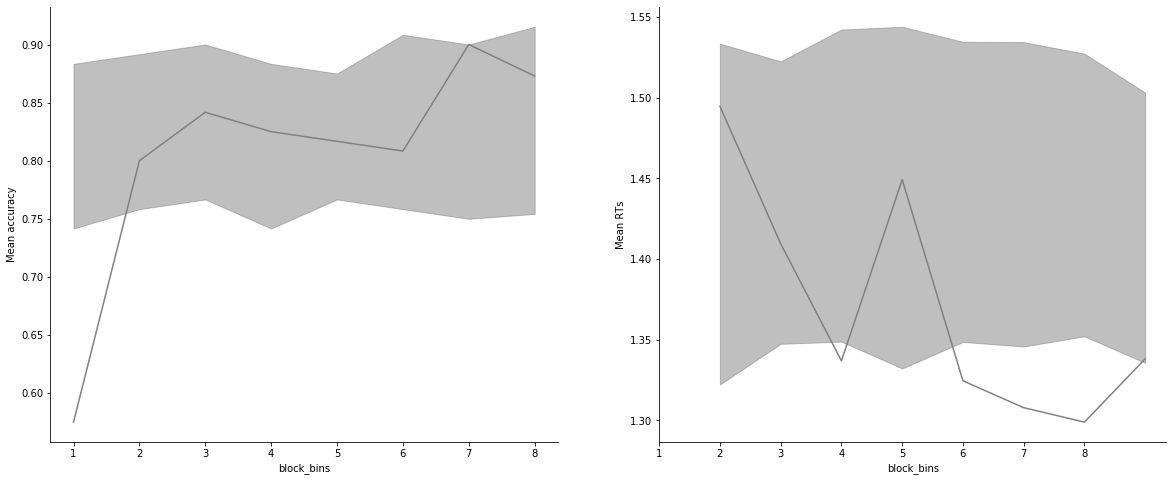

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

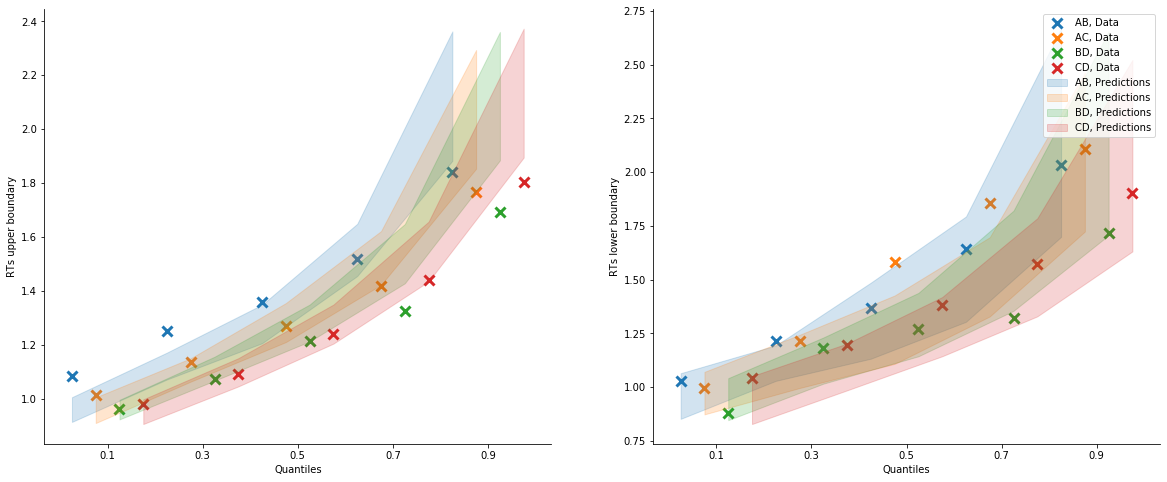

In [28]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

### Get last values for eventual further sampling

In [29]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_drift,mu_ndt,mu_threshold,sd_drift,sd_ndt,sd_threshold,z_drift[1],...,z_drift[3],z_drift[4],z_ndt[1],z_ndt[2],z_ndt[3],z_ndt[4],z_threshold[1],z_threshold[2],z_threshold[3],z_threshold[4]
499,0,499,0,0.955502,-0.871960,-0.805258,0.174396,1.072231,1.236884,0.442556,...,-0.391802,-0.904403,1.039055,0.711226,1.116249,0.837764,1.814496,1.846134,1.743880,2.284800
999,1,499,0,0.746308,-1.679223,0.801323,0.410724,1.961740,0.472706,1.036702,...,0.226317,0.031280,0.990264,0.817050,1.037644,0.846083,1.442860,1.259752,0.988266,2.495337
